## Assignment 4

In this assignment we're going to continue our dynamic programming exercise from class. We'll align two strings, filling in a DP matrix with the appropriate scores. To make things simple, we'll use a straightforward scoring scheme. 

In [ ]:
# import numpy to our workspace
import numpy as np

### lets get the pretty-print code from the lecture

In [ ]:
def pretty_print_alignment(seq_A, seq_B, dp_matrix):
    '''
    This function does a lot of justification (ljust and print) to align the sequence and matrix
    We can copy-paste this into future code to help debug what our matrix is doing
    '''
    print("".join([letter_in_B.rjust(6) for letter_in_B in "-" + seq_B]))

    for row_label, row in zip("-" + seq_A, dp_matrix):
        print(row_label + "".join([str(mat_value).rjust(6) for mat_value in row]))


### And create a test matrix, and print it

In [ ]:
# ! rerun this cell to reset the matrix

sequence_A = "ATGC-TTA-".replace("-","")
sequence_B = "-TGCATTAA".replace("-","")

our_dp_matrix = np.zeros((len(sequence_A) + 1, len(sequence_B) + 1))

pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

### Now we're going to fill in the matrix for our alignment

Lets create the piecewise function that maximizes the score. First we'll need some scoring functions

In [ ]:
# ours scores:
match_score = 5
mismatch_score = -4
gap_score = -10

### Now lets create in a function we'll use to update each cell in the matrix

This function is going to be called for each cell in the matrix, one at a time, like the red box:

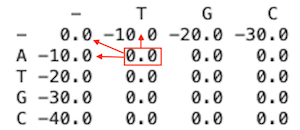

#### The function parameters will be: 
- upper_score: the score in the cell above 
- diagonal_score: the score in the cell diagonal up and to the left
- left_score: the score in the cell to the left
- base_a: the base corresponding to this row in the aligned sequence on the left hand side
- base_b: the base corresponding to this row in the aligned sequence on the top

We'll return the value that the matrix's cell should be updated with. This value is calculated with the following function:


$
score(i,j) = \max
\begin{cases} 
      score(i-1,j-1) + \text{our match or mismatch score} \\
      score(i-1,j) + \text{gap cost} \\
      score(i,j -1) + \text{gap cost} \\
   \end{cases}
$

In [ ]:
# 3 points 
def update_score_with_max(upper_score, diagonal_score, left_score, base_a, base_b):
    # first calculate if this is a match or mismatch and get the score
    match_mismatch_score = match_score
    if base_a != base_b:
        match_mismatch_score = # FILL IN CORRECT VARIABLE HERE
    
    # calculate the full upper diagonal score
    full_diagonal_score = diagonal_score + match_mismatch_score
    
    # calculate the full score coming from the left cell
    full_left_score = left_score + # FILL IN CORRECT VARIABLE HERE
    
    # calculate the full score coming from the above (upper) cell
    full_upper_score = upper_score + # FILL IN CORRECT VARIABLE HERE
    
    # there are many ways to get the max value, here we're going to put them into an array and call max
    return(max([full_diagonal_score,full_left_score,full_upper_score]))

### Now lets setup our matrix

In [ ]:
# 2 points

### first lets set the first row and column like in class
for i in range(0,our_dp_matrix.shape[1]):
    our_dp_matrix[0,i] = i * # FILL IN CORRECT VARIABLE HERE

for i in range(0,our_dp_matrix.shape[0]):
    our_dp_matrix[i,0] = i * # FILL IN CORRECT VARIABLE HERE
  

### Check the setup of our matrix

In [ ]:
pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

### Lastly let's iterate over the values in the matrix and set the scores 

In [ ]:
# 3 points
for i in range(1,len(sequence_A)+1): # rows
    
    for j in range(1,len(sequence_B)+1): # columns:
        
        # The offsets for bases is a little strange due to the matrix setup we talked about in class
        new_value = update_score_with_max(our_dp_matrix[i - 1, j], # for long functions we can separate
                                          our_dp_matrix[i - 1, j - 1], # parameters on new lines, which
                                          our_dp_matrix[i, j - 1], # makes it easier to read
                                          sequence_A[i - 1], 
                                          sequence_B[j - 1])
        
        # **** uncomment and fill in this line
        # our_dp_matrix[FILL IN MATRIX POSITION HERE] = new_value

### Check the resulting alignment

In [ ]:
pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

## Given the alignment above, what score do you expect in the lower righthand corner? (retorical, I'm just checking the matrix)